In [1]:
# pretraitement des donnes

import pandas as pd
df = pd.read_csv("titanic-passengers.csv", sep=";")
df['Age'].fillna(df['Age'].mean(),inplace=True)
df.replace({'Sex':{'male': 1,'female':0}},inplace=True)
df['Cabin'] = df.Cabin.fillna('G6')
df.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,G6,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,G6,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,G6,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,S


In [8]:
# on importe les bibliotheques a utiliser
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.metrics import accuracy_score
import graphviz
import matplotlib.pyplot as plt

#extraction des donnees
feature=['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare']
x=df.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= df["Survived"]

# on separe les donnees en donnees d'entrainement et de test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)


In [29]:
# on cree notre model
tree_model=tree.DecisionTreeClassifier(criterion="gini",splitter='best',max_depth=2)

In [33]:
# on applique le model au donnees d'entrainement
tree_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [34]:
# testons notre model
tree_model.predict(x_test)
tree_model.score(x_test,y_test)

0.770949720670391

[Text(167.4, 181.2, 'Sex <= 0.5\ngini = 0.469\nsamples = 712\nvalue = [444, 268]'),
 Text(83.7, 108.72, 'Pclass <= 2.5\ngini = 0.39\nsamples = 252\nvalue = [67, 185]'),
 Text(41.85, 36.23999999999998, 'gini = 0.1\nsamples = 133\nvalue = [7, 126]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.5\nsamples = 119\nvalue = [60, 59]'),
 Text(251.10000000000002, 108.72, 'Pclass <= 1.5\ngini = 0.296\nsamples = 460\nvalue = [377, 83]'),
 Text(209.25, 36.23999999999998, 'gini = 0.461\nsamples = 100\nvalue = [64, 36]'),
 Text(292.95, 36.23999999999998, 'gini = 0.227\nsamples = 360\nvalue = [313, 47]')]

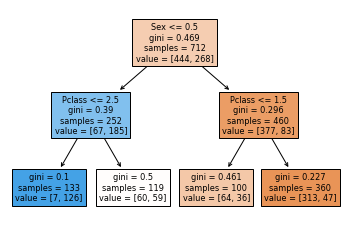

In [35]:
# on trace l'arbre de decision 
tree.plot_tree(tree_model,filled=True,feature_names=feature)

on constate que si Pclass est inferieur a 2.5 le passager peut survivre car la valeur de gini tres petit(0.1)

In [36]:
# changeons les parametres maintenant
x1=df.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked","Sex","Parch","PassengerId","Pclass"], axis=1)
y1= df["Survived"]

# on separe les donnees en donnees d'entrainement et de test
x1_train, x1_test, y1_train, y1_test = train_test_split(x,y, test_size=0.30,random_state=10)


In [37]:
# on applique le model au donnees d'entrainement
tree_model.fit(x1_train,y1_train)

DecisionTreeClassifier(max_depth=2)

In [38]:
tree_model.score(x1_train,y1_train)

0.7961476725521669

In [39]:
# testons notre model
tree_model.predict(x1_test)
tree_model.score(x1_test,y1_test)

0.7873134328358209

en modifiant les parametres(on suprime les colonnes sexe et Pclass) on constate que la performance de notre model augmente

In [40]:
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [41]:
clf=RandomForestClassifier(n_estimators=100)  #Creation d'un  random forest avec 100 decision trees
clf.fit(x_train, y_train)  #entrainement de notre model
y_pred=clf.predict(x_test)  #test de notre model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Mesure de la performance de notre model

Accuracy: 0.8324022346368715


In [42]:
# Changeons le nombre d'estimateur
# on utilise bagging methode
from sklearn.ensemble import BaggingClassifier
clf1=BaggingClassifier(tree.DecisionTreeClassifier(),max_samples=0.5,max_features=0.5,n_estimators=200)

In [43]:
clf1.fit(x_train,y_train)
z=clf1.predict(x_test)
accuracy= clf1.score(x_test,y_test)
print(accuracy)

0.8491620111731844


on constate que la performance de notre model augmente parrapport au model precedant